# Testing advanced masking for near surface temperature (tas)

## Import libraries

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from xclim import ensembles as ens

from src.preproces import *
from src.plotting import *
from src.create_masked_climatology import *
from pathlib import Path


file_handler = Handle_Files()
var = 'tas'
main_data_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/Annualclimatologies/nomask/' + var
SSPs = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

## Identify regions with high inter SSP variations for masking

In [3]:
ensambles = {scenario: ens.create_ensemble(Path(main_data_folder + '/' + scenario).glob("*.nc")) for scenario in SSPs}

[2024-02-26 10:05:36.184] [Process: 692256] [error] [1708938336184856538-Global] TileDB internal: Error initializing thread pool of concurrency level 0; Resource temporarily unavailable
[2024-02-26 10:05:36.201] [Process: 692256] [error] [1708938336184856538-Global] TileDB internal: Error initializing thread pool of concurrency level 0; Resource temporarily unavailable


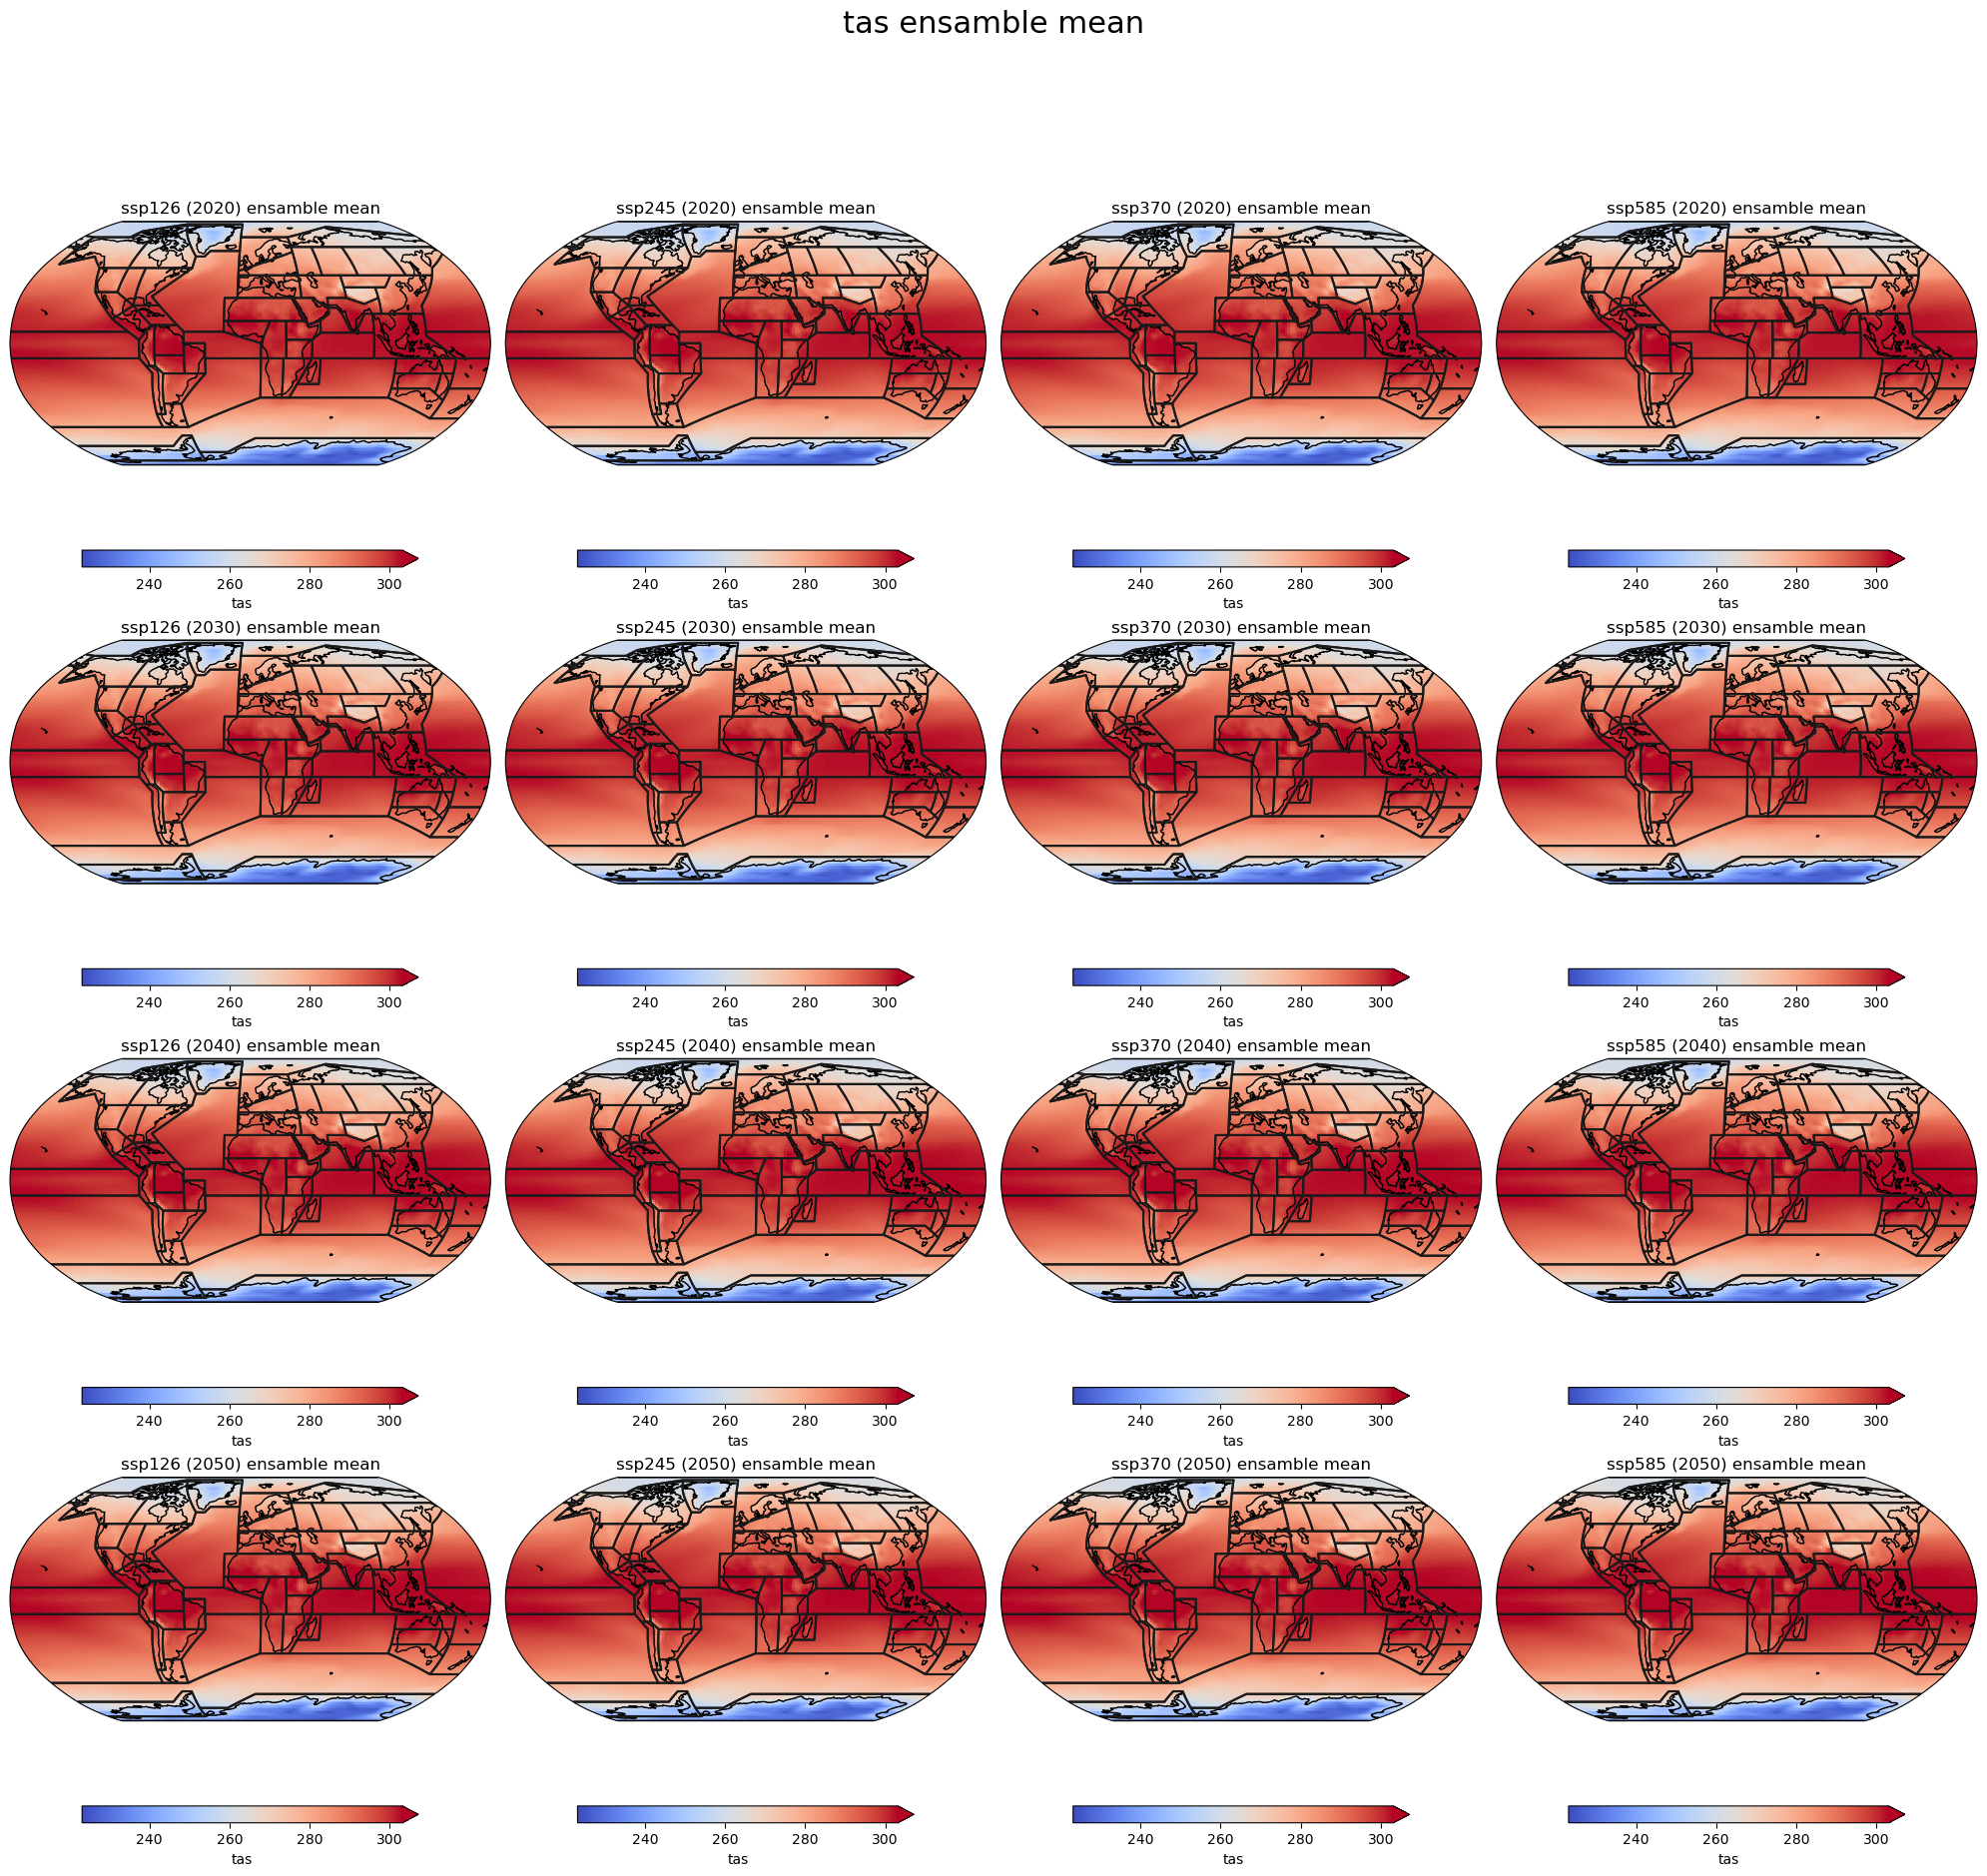

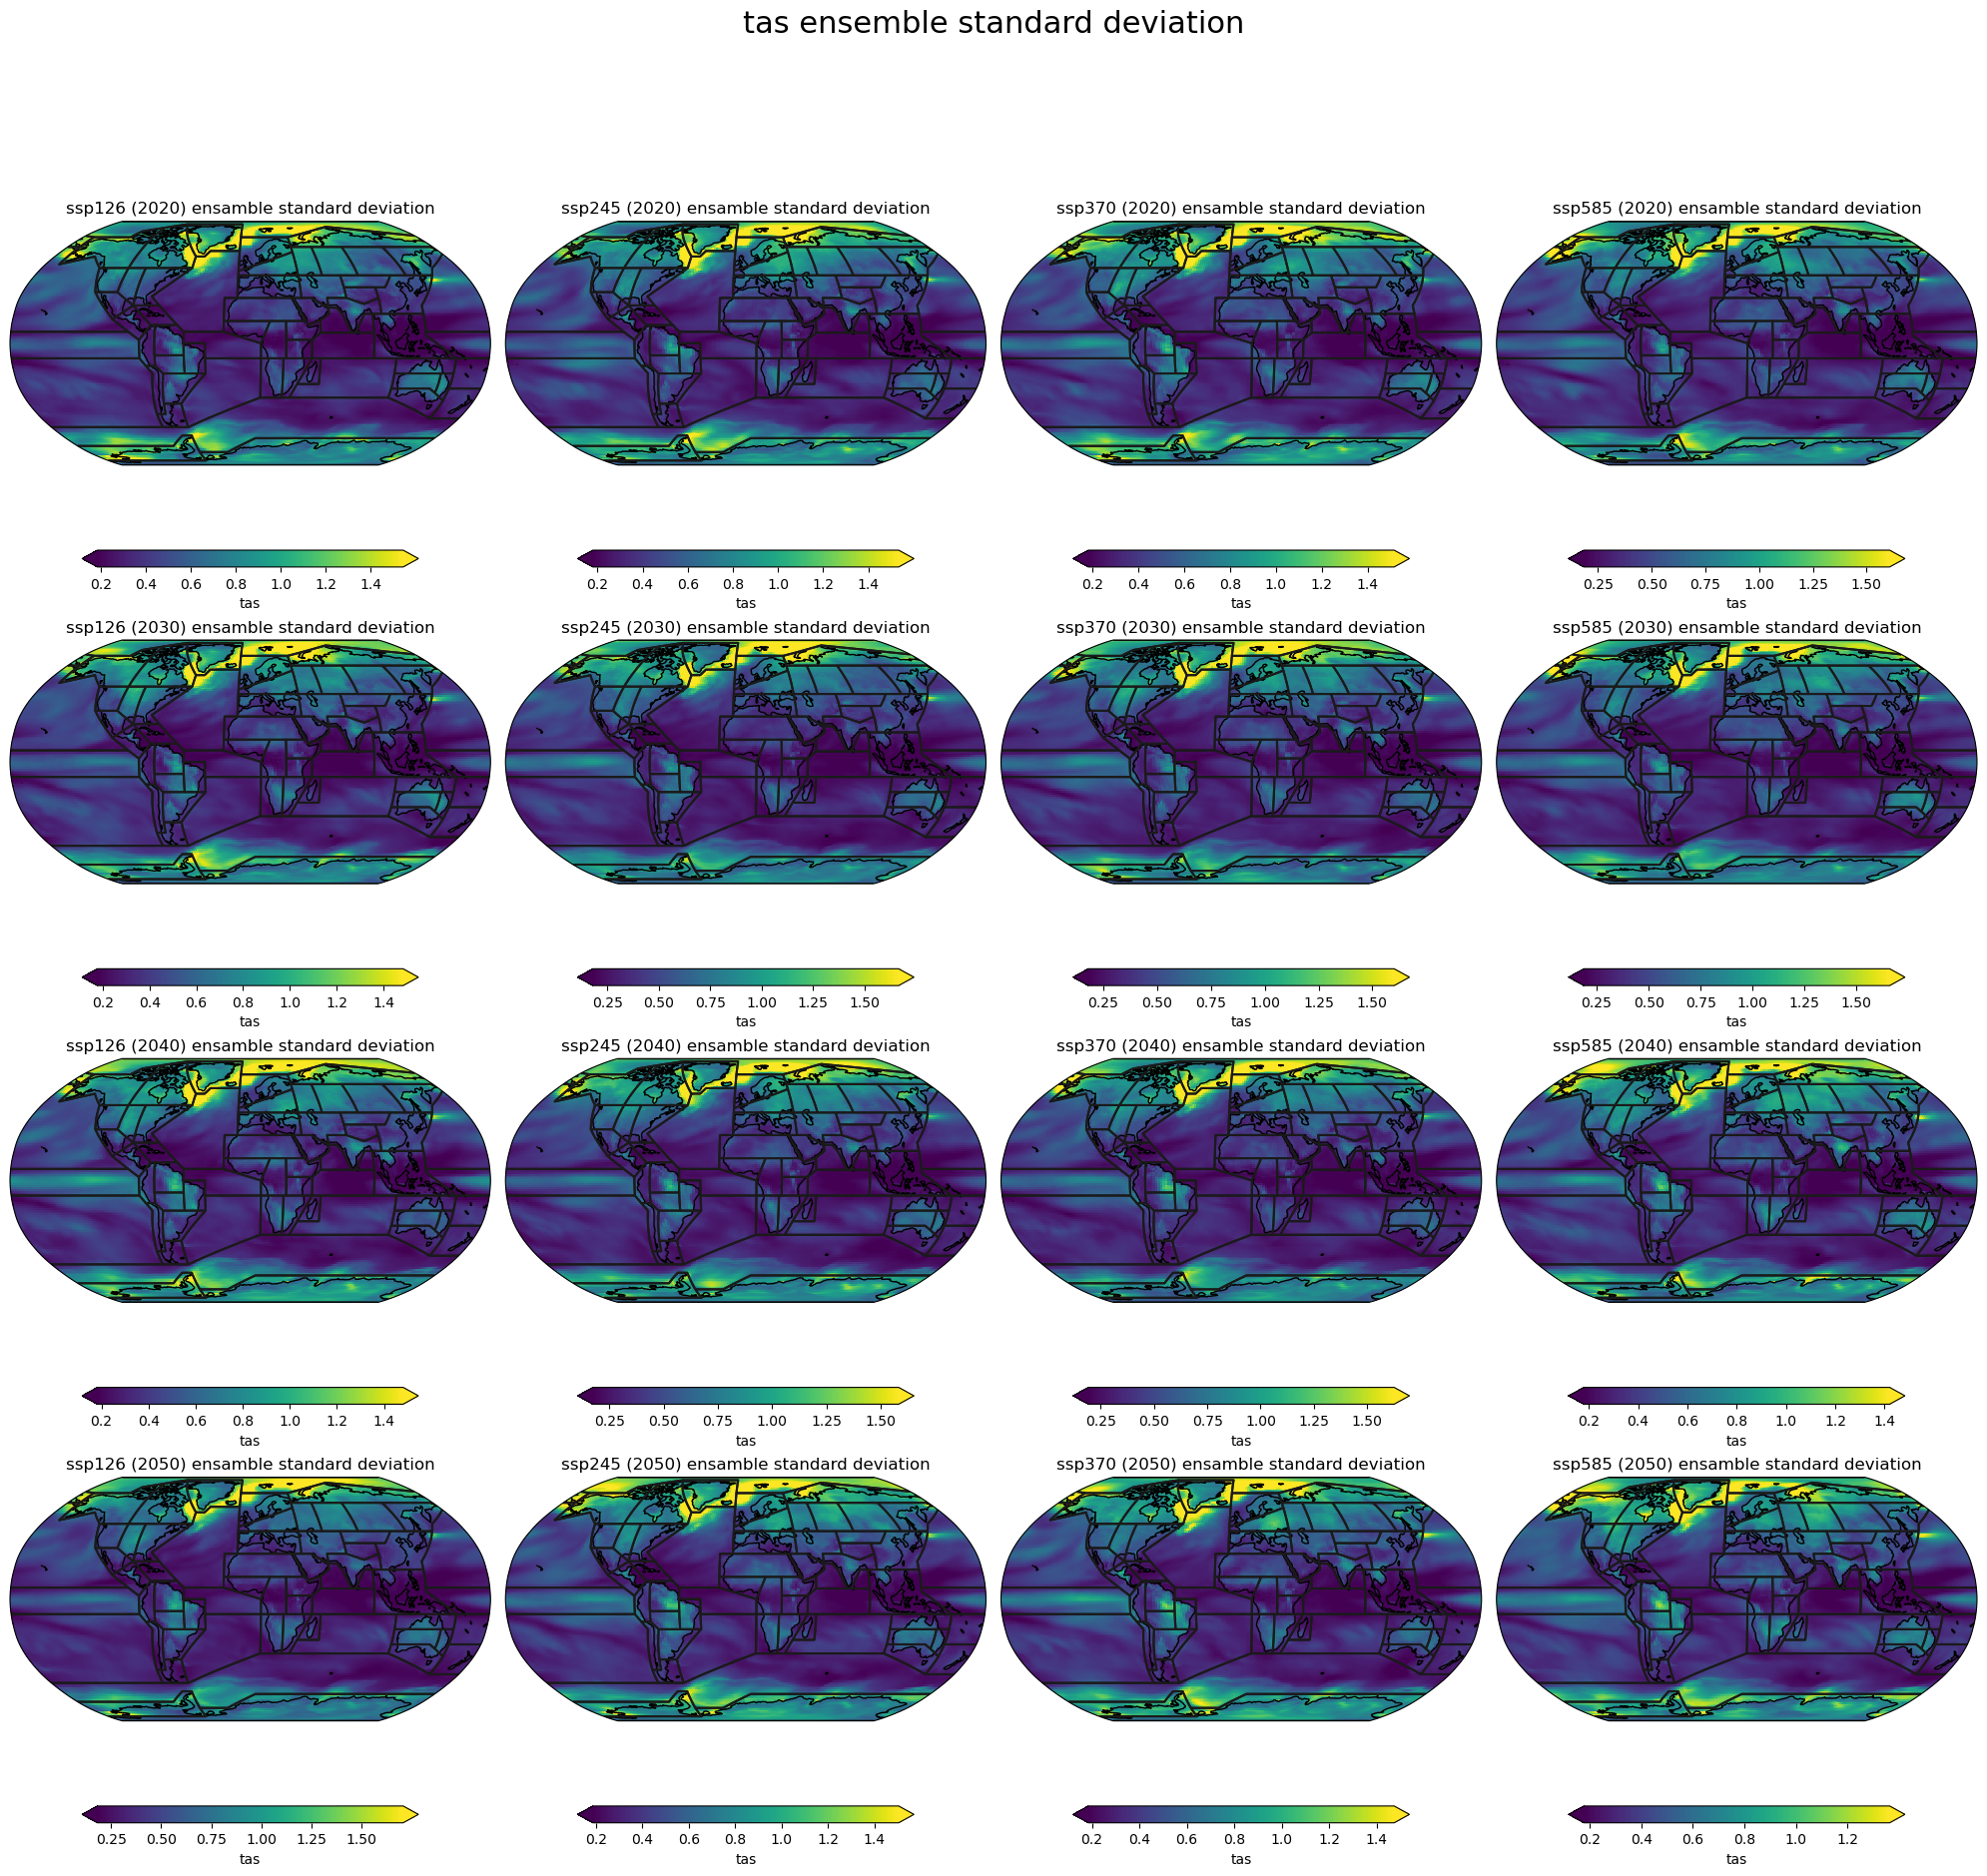

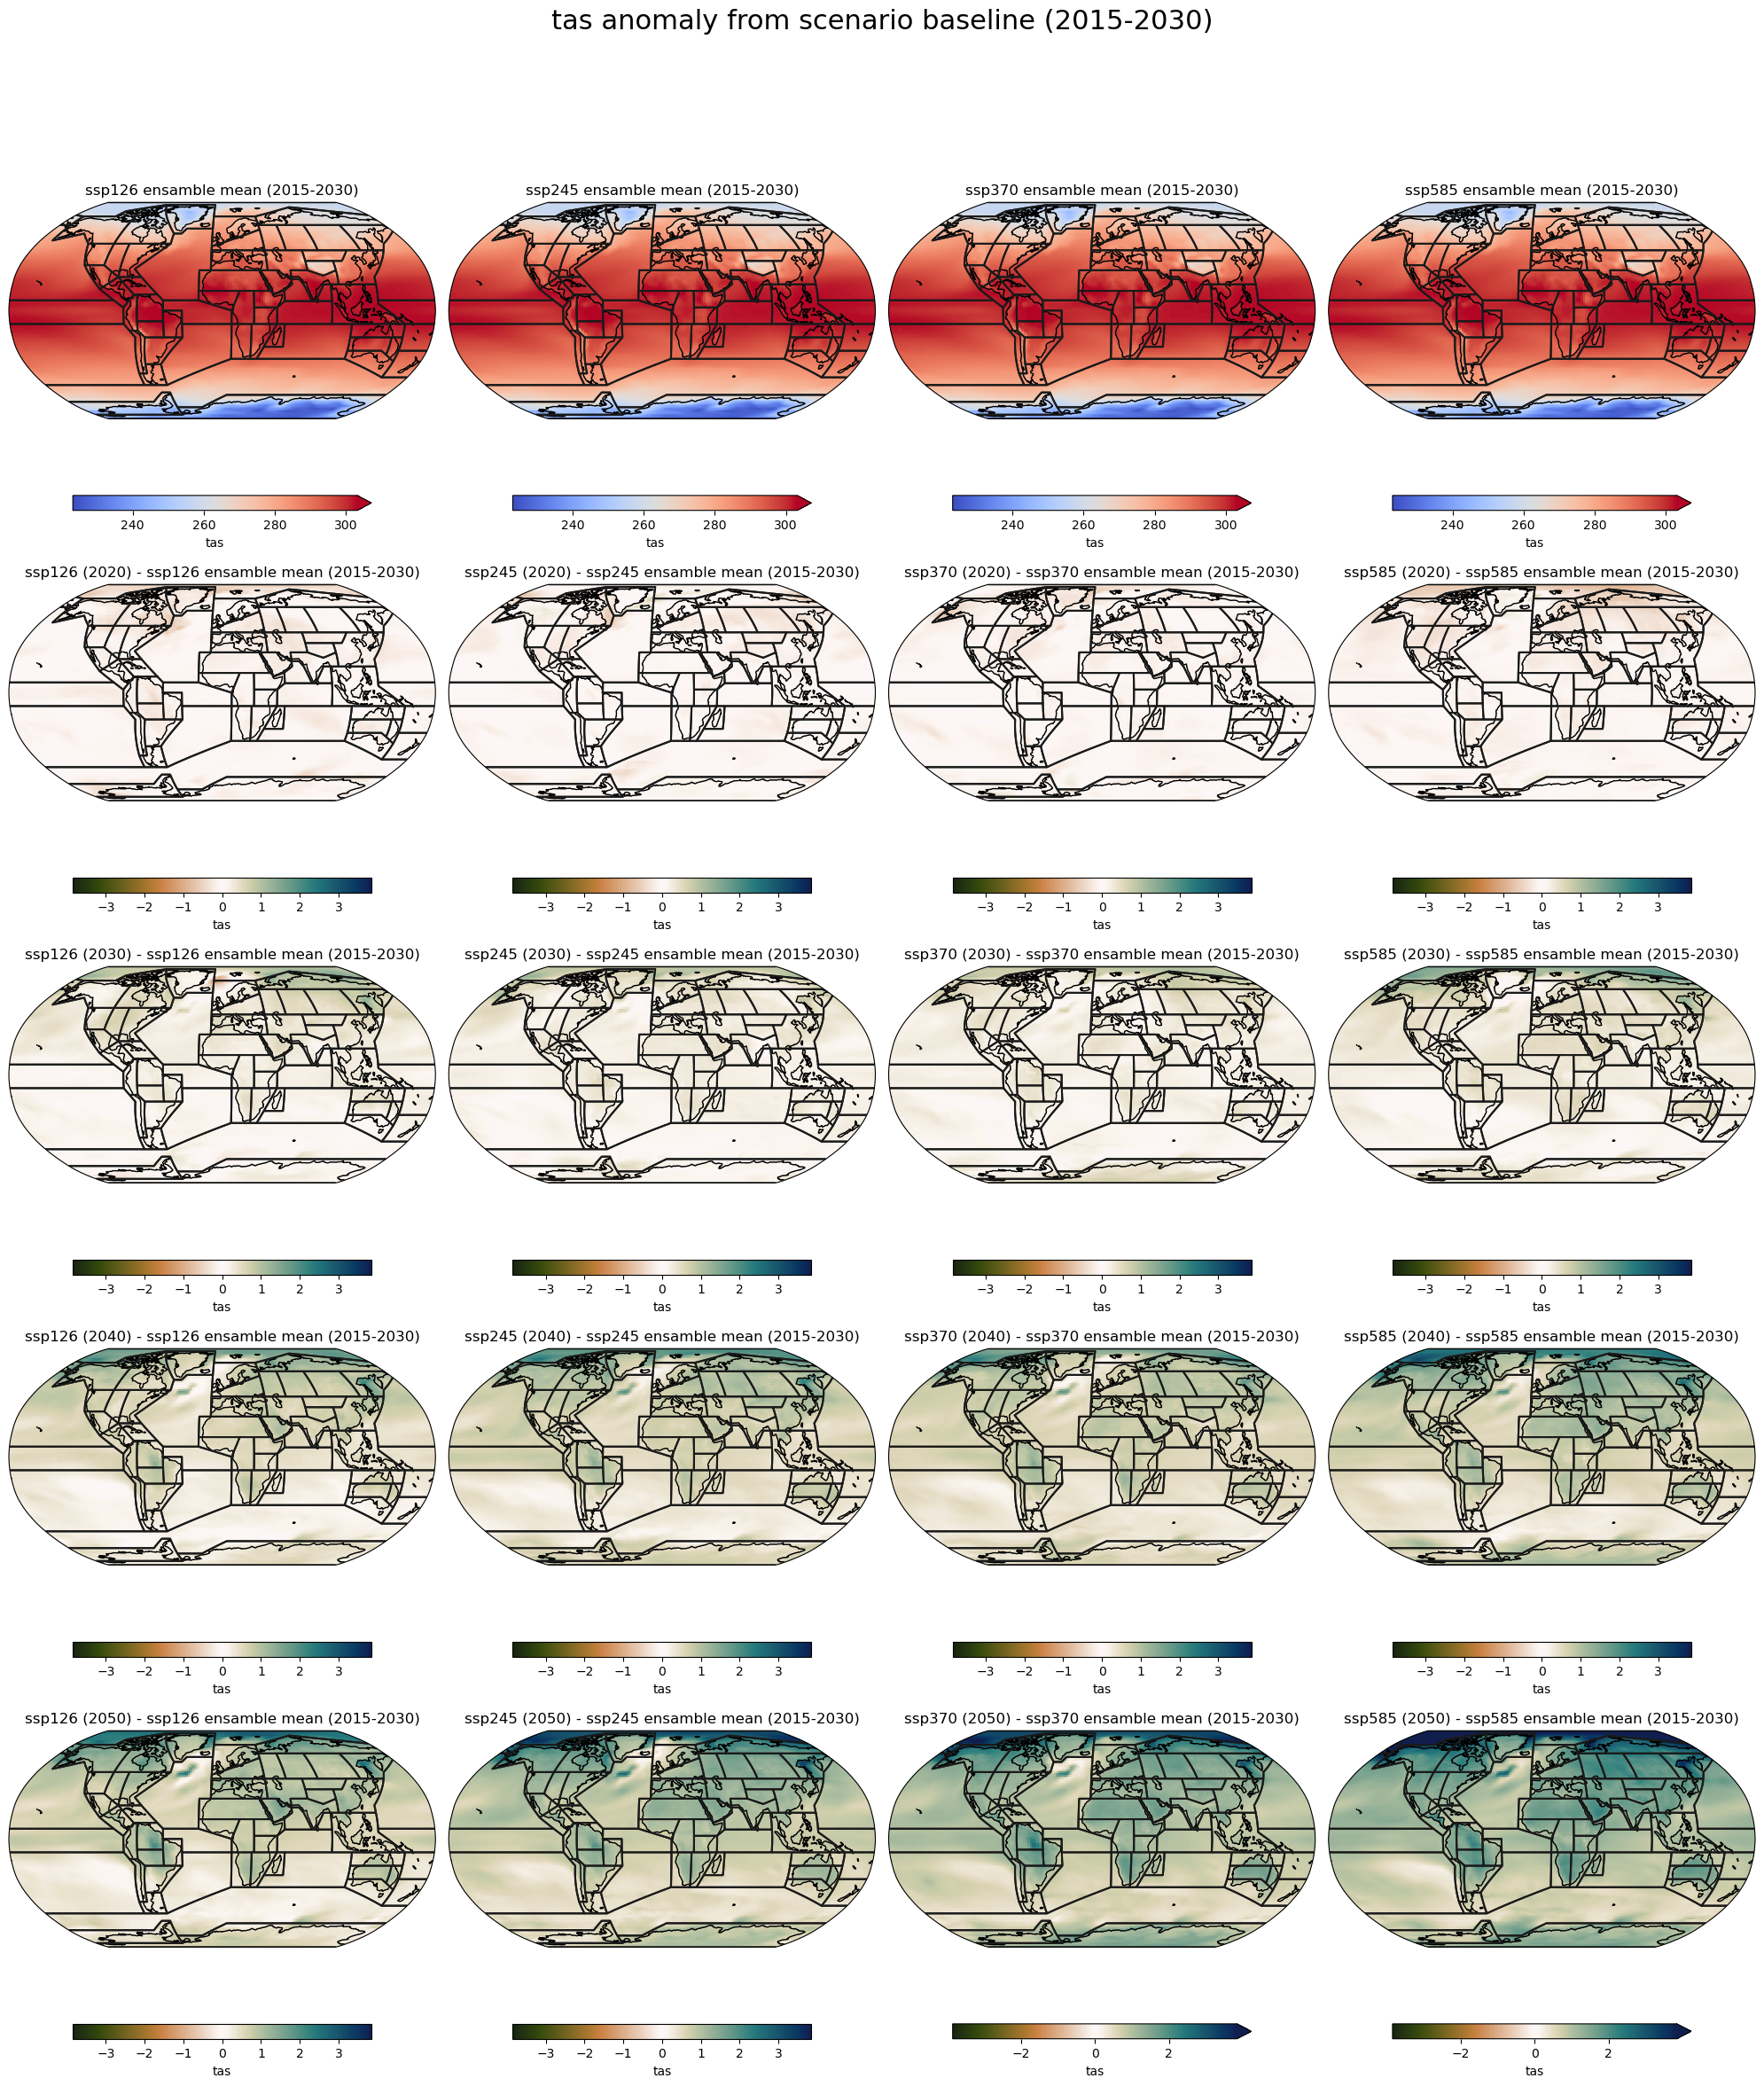

In [3]:
plot_mapplots_for_investigation(ensambles, var, [2020, 2030, 2040, 2050], SSPs)

We will try creating a NH artic mask as the anamolies indicate a more rapid heating here.

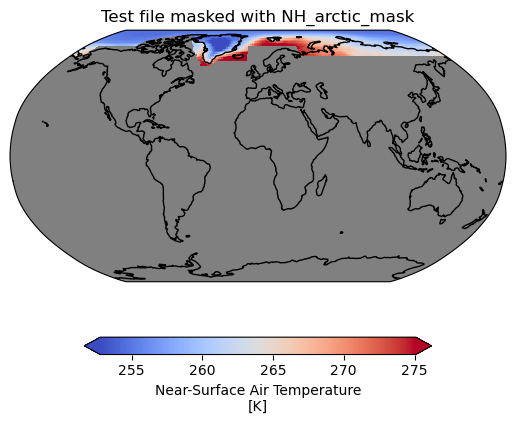

In [2]:
NH_arctic_mask = create_mask_from_AR6_abriviations(['ARO', 'GIC', 'RAR'], 
                                                   new_mask_name = 'NH_arctic_mask', 
                                                   var = 'tas')
test_file = open_dummy_file(var)
masked_test_file = test_file.where(NH_arctic_mask.mask)

plot_on_map(masked_test_file[var].isel(year=0), title='Test file masked with NH_arctic_mask', temperature='abs')

In [3]:
file_handler.save_dataset_to_netcdf(NH_arctic_mask, 
                                    'NH_arctic_mask_ACCESS-ESM1-5.nc', 
                                    '/nird/home/johannef/Masterthesis_S23 DataFiles/masks')

'/nird/home/johannef/Masterthesis_S23 DataFiles/masks/NH_arctic_mask_ACCESS-ESM1-5.nc'

In [ ]:
mask_names = ['land_mask', 'sea_mask', 'NH_arctic_mask', 
              'lat_mask_pm30deg', 'sea_mask_pm30deg', 'lat_mask_pm15deg', 'sea_mask_pm15deg']

for mask_name in mask_names:
    create_masked_climatologies(mask_name, 
                                var=var, 
                                excisting_mask=True, 
                                test_file=open_dummy_file(var))

After running this script we now have new masked regions that can be investigated. We start by looking at the ensambles and compairing to the globally masked ensambles. 

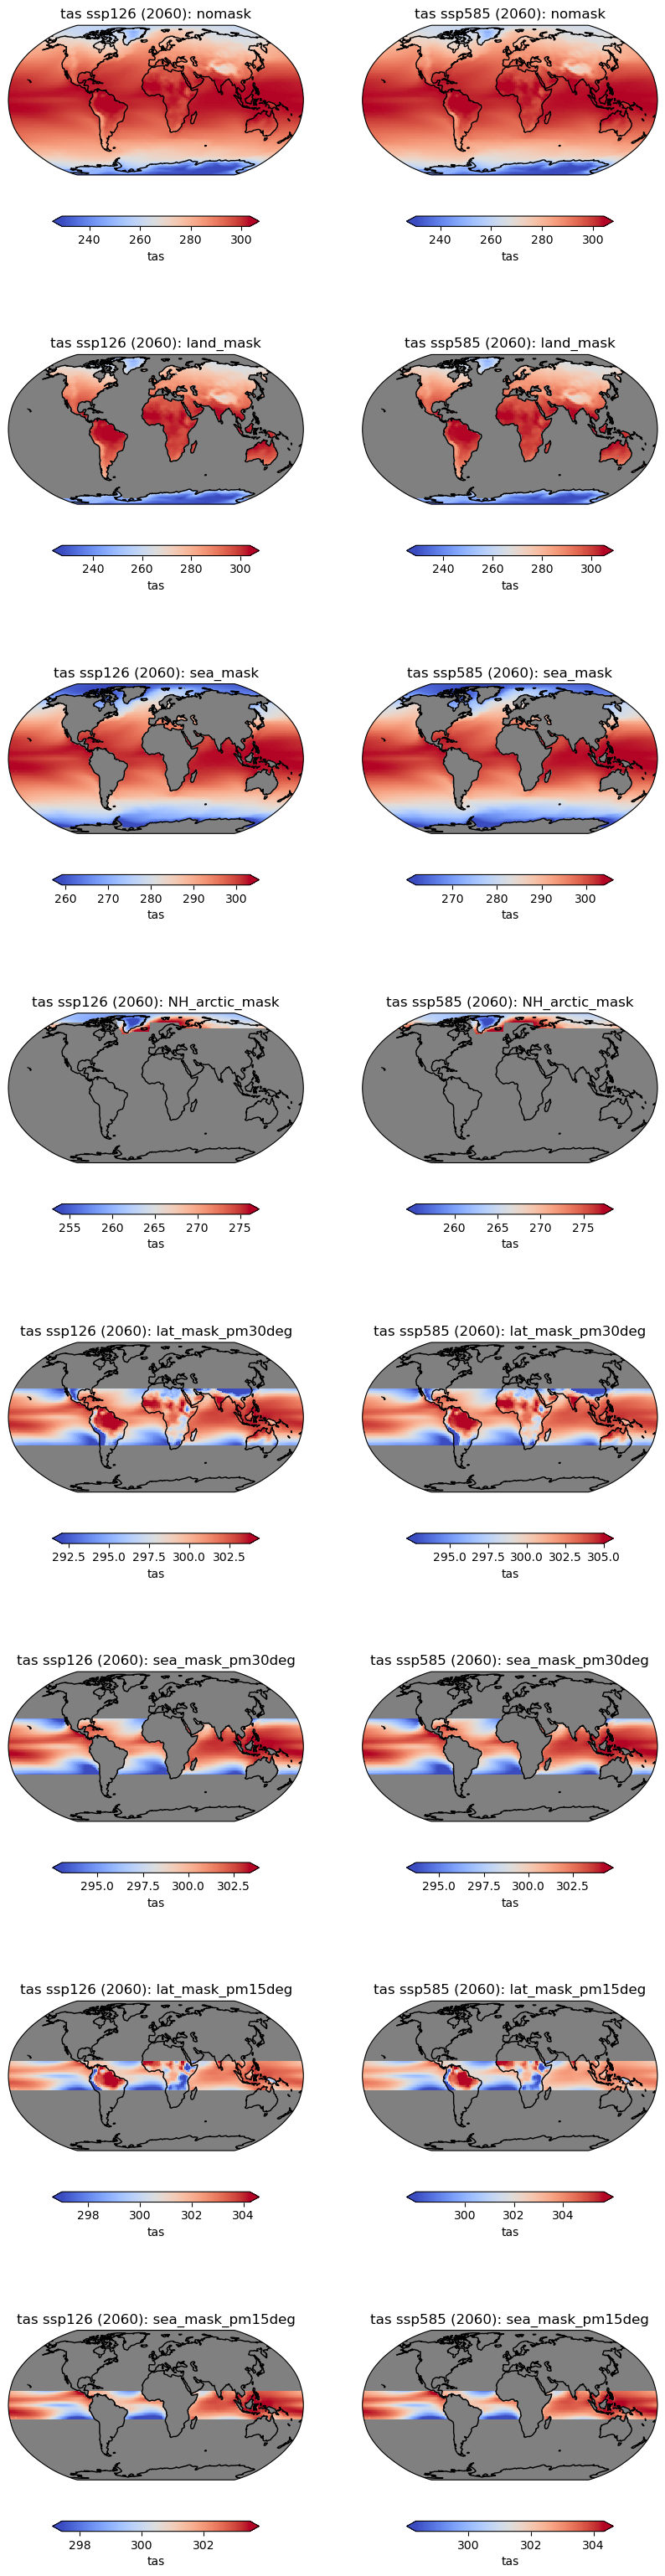

In [8]:
main_data_dir = '/nird/home/johannef/Masterthesis_S23 DataFiles/Annualclimatologies'
SSPs = ['ssp126', 'ssp585']
var = 'tas'
mask_names = ['nomask', 'land_mask', 'sea_mask', 'NH_arctic_mask', 
              'lat_mask_pm30deg', 'sea_mask_pm30deg',
              'lat_mask_pm15deg', 'sea_mask_pm15deg',]
fig, axs = plt.subplots(ncols=len(SSPs), nrows=len(mask_names), 
                        figsize=(5*len(SSPs), 5*len(mask_names)),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0), facecolor="gray"))
axs = axs.flatten()

i = 0
for mask_name in mask_names:
    mask_data_dir = '/'.join([main_data_dir, mask_name, var])
    for scenario in SSPs:
        data_dir = '/'.join([mask_data_dir, scenario])
        ensamble = ens.create_ensemble(Path(data_dir).glob("*.nc")) 
        ensamble_mean = ensamble.mean(dim='realization') 

        plot_on_map(ensamble_mean.sel(year=2060)[var], 
                    ax=axs[i], 
                    title=f'{var} {scenario} ({2060}): {mask_name}', 
                    temperature='abs')

        i += 1

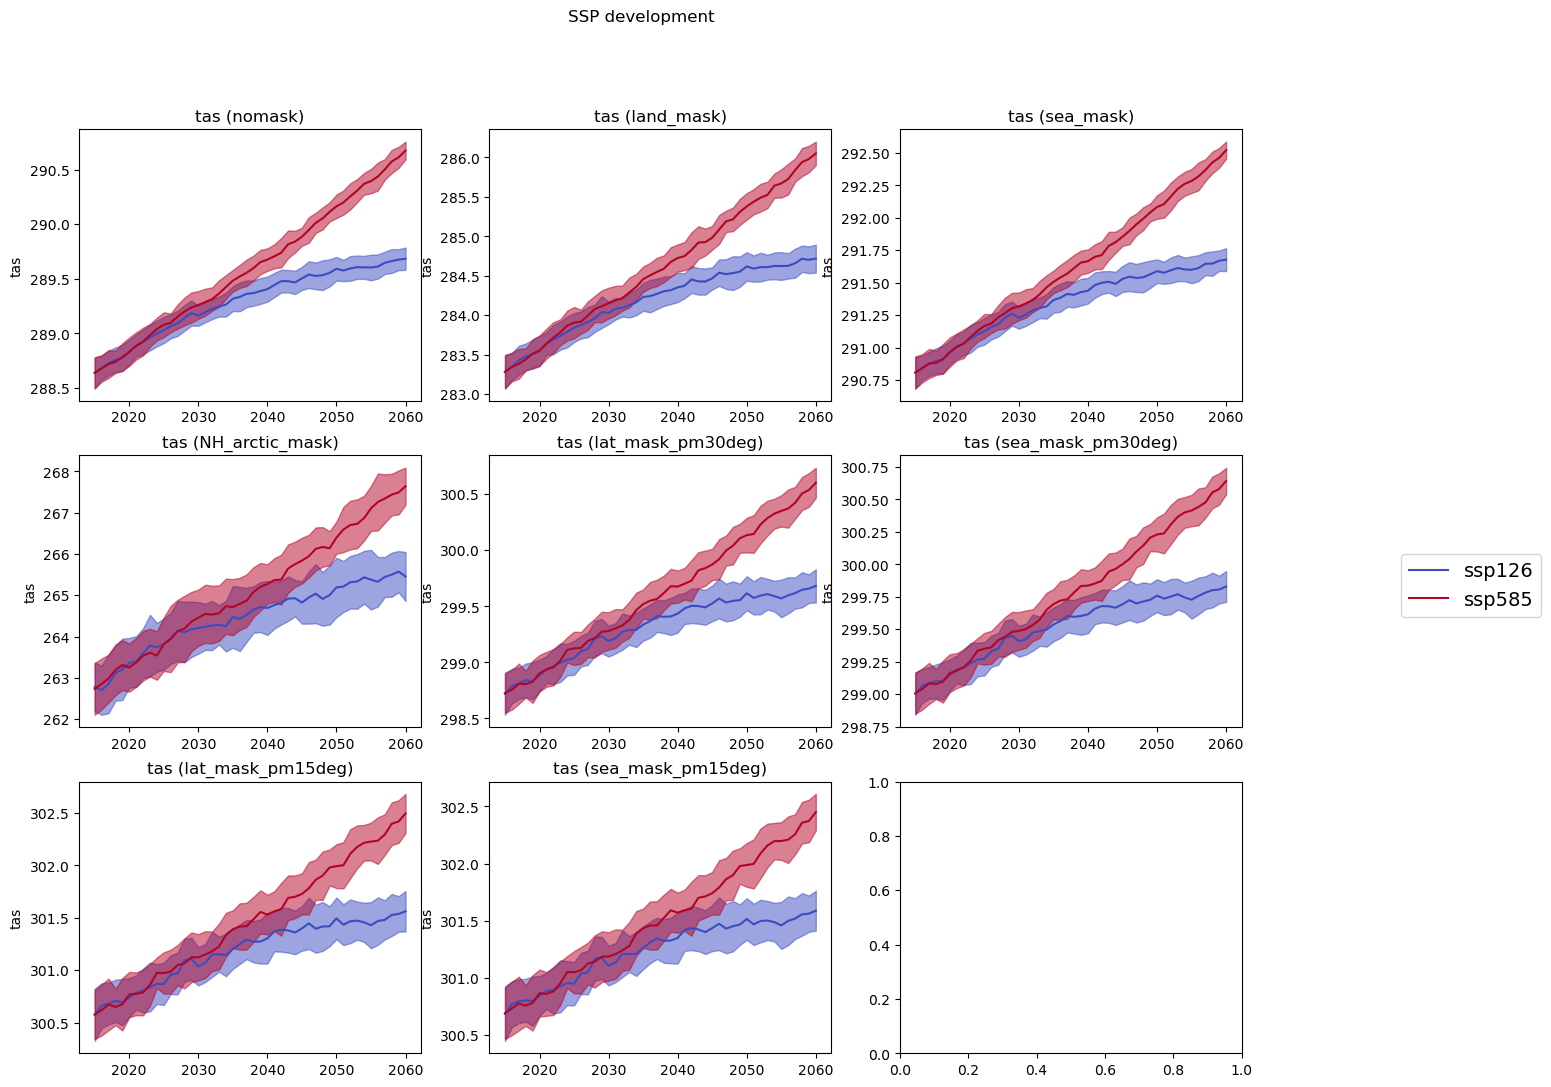

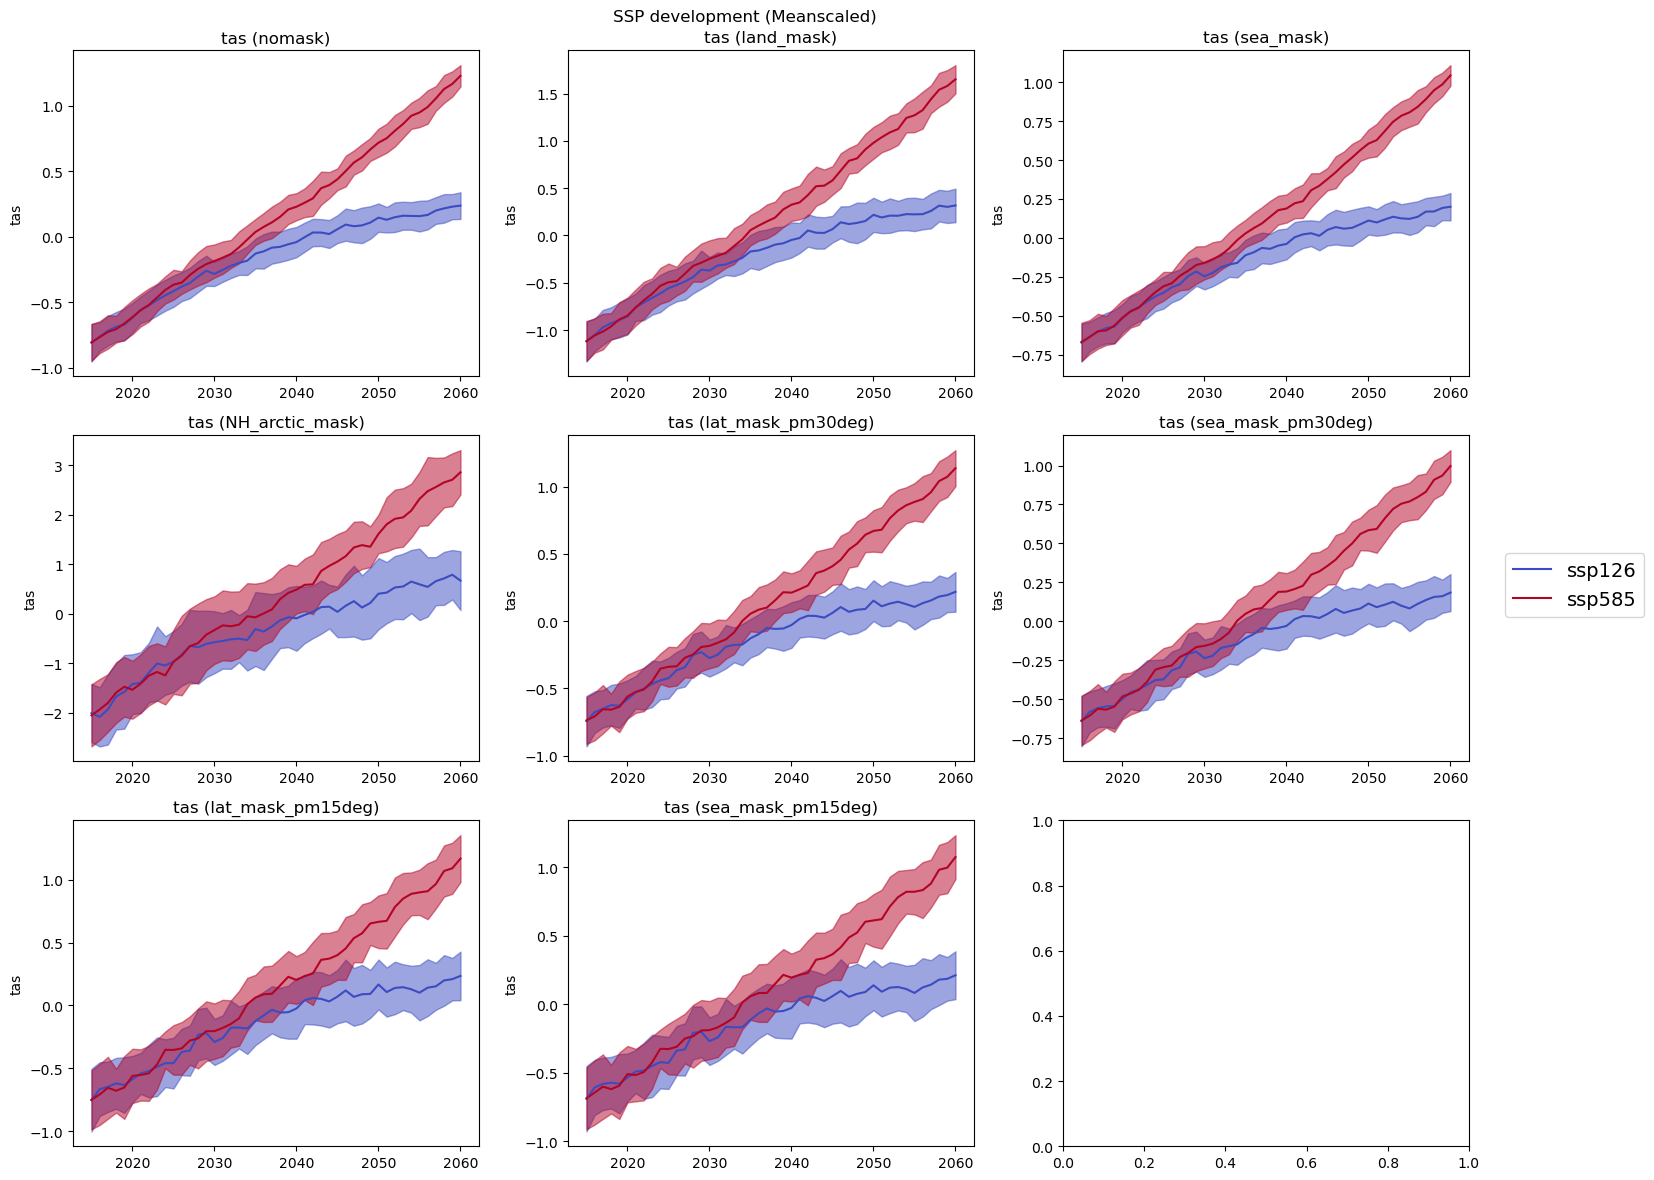

In [9]:
main_data_dir = '/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies'
SSPs = ['ssp126', 'ssp585']
var = 'tas'
plot_annual_global_ensambles(main_data_dir, SSPs, var, mask_names, temporal_range=(2015, 2060))

The arctic masking has a lower SNR and the trend is emerging slower there then in the more basaic masking. I will keep:
- nomask
- landmask
- seamask

climatologies. 